# AIP Assignment 2

@uthors: Darshil Patel(202011034), Vaidik Patel(202011038), Mayank Patel(202011045)

# Import useful modules

In [1]:
#useful modules

import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

# Q1

In [2]:
#read image in BGR form and convert it to gray 
img1 = cv2.cvtColor(cv2.imread('mask_orig.png'), cv2.COLOR_BGR2GRAY)
print(type(img1))
print(img1.size)
print(img1.shape)
#print(img)

<class 'numpy.ndarray'>
147456
(384, 384)


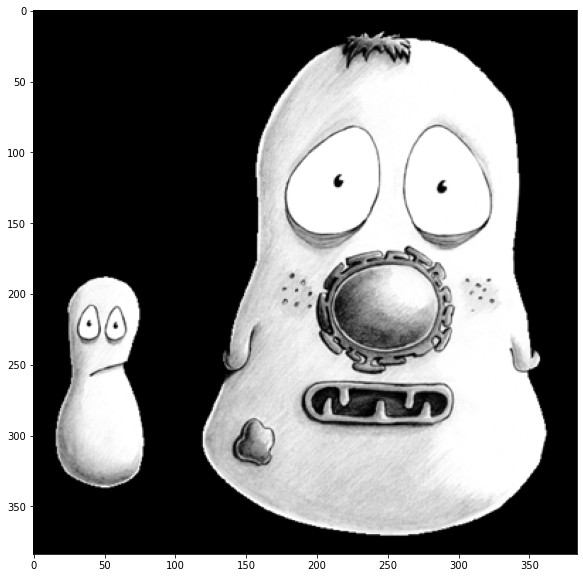

In [28]:
#original image
plt.imshow(img1,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

In [4]:
# cv2.imshow('img',img1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

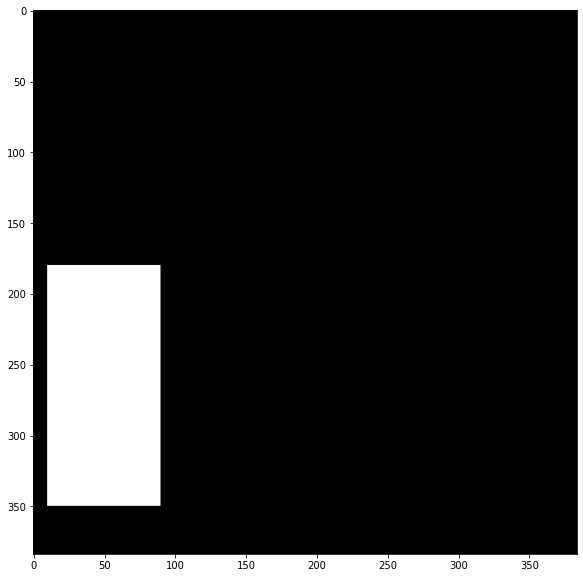

In [5]:
# generating mask 
mask = np.zeros_like(img1)
white = np.ones((170,80))
mask[180:350,10:90] = white
plt.imshow(mask,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

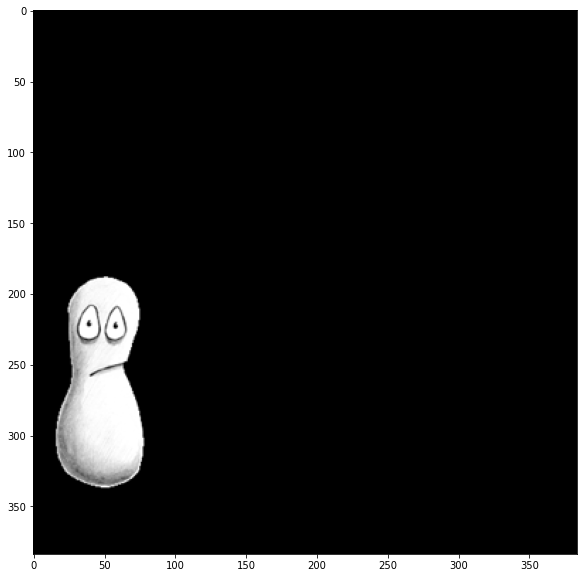

In [6]:
# multiplication removes the bigger object

masked_img1 = img1*mask
plt.imshow(masked_img1,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

# Q2

In [7]:
# read image 1

img21 = cv2.cvtColor(cv2.imread("image-math-person1.png"), cv2.COLOR_BGR2GRAY)
print(type(img21))
print(img21.size)
print(img21.shape)

<class 'numpy.ndarray'>
307200
(480, 640)


In [8]:
# read image 2

img22 = cv2.cvtColor(cv2.imread("image-math-person2.png"), cv2.COLOR_BGR2GRAY)
print(type(img22))
print(img22.size)
print(img22.shape)

<class 'numpy.ndarray'>
307200
(480, 640)


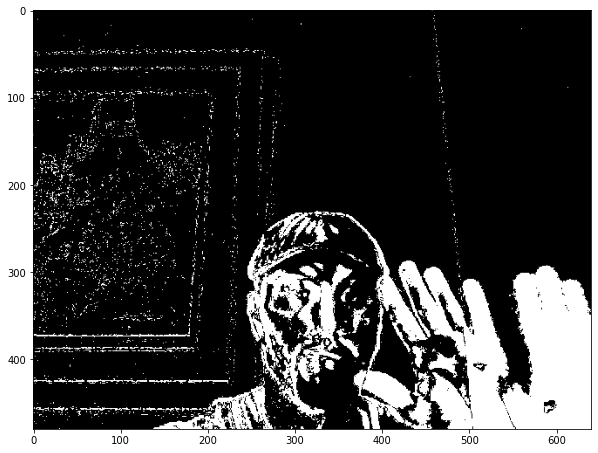

In [20]:
# find where the pixel change is occured

ans = np.zeros_like(img21)

#change tolerance threshold value
threshold = 10


for i in range(img21.shape[0]):
    for j in range(img21.shape[1]):
        # if pixel change is more than threshold then retuens 1
        ans[i,j] = 0 if (img21[i,j]-threshold) < img22[i,j] < (img21[i,j]+threshold) else 1
plt.imshow(ans,cmap='gray')
plt.rcParams["figure.figsize"]=10,10
plt.show()

In [21]:
# percentage of change in pixels calculation number of 1s in answer
pr = np.count_nonzero(ans)/(ans.shape[0]*ans.shape[1])
print(pr*100)

16.360026041666668


# Q3

normalized cross corelation result:
[[0.8502626  0.8505249  0.85079443 ... 0.7830146  0.7830391  0.7837871 ]
 [0.84991175 0.85040134 0.8509349  ... 0.78125036 0.781092   0.7816344 ]
 [0.84945714 0.8499943  0.8507294  ... 0.77983314 0.7792694  0.7794166 ]
 ...
 [0.71857595 0.7168521  0.71509755 ... 0.6192716  0.62061405 0.6220063 ]
 [0.7198459  0.7181365  0.7163905  ... 0.6182316  0.6196285  0.6210132 ]
 [0.7209953  0.71930504 0.71756566 ... 0.6172824  0.6186943  0.6200755 ]]
matching location:
(array([301]), array([305]))


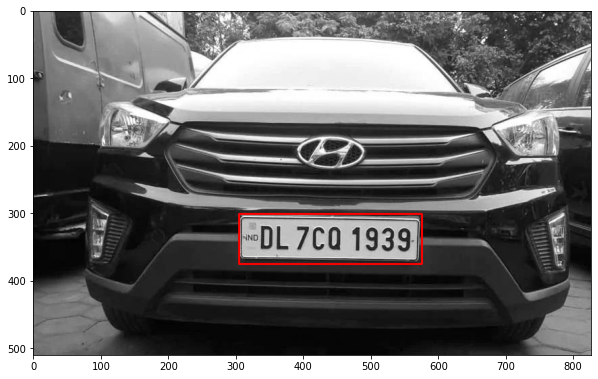

In [11]:
# Read the main image 
car_img_rgb = cv2.imread('number_plate.jpeg')
  
# Convert it to grayscale 
car_img_gray = cv2.cvtColor(car_img_rgb, cv2.COLOR_BGR2GRAY) 
  
# Read the template 
num_plate_template = cv2.imread('plate.jpeg',0) 

# Store width and height of template in w and h in reverse(column,rows)
width, height = num_plate_template.shape[::-1] 
  
# Perform match operations. 
res = cv2.matchTemplate(car_img_gray,num_plate_template,cv2.TM_CCORR_NORMED) 
#here we using normalized cross corelation method for template matching
print("normalized cross corelation result:")
print(res)  
# Specify a threshold for find matching location
threshold = 0.99
  
# Store the coordinates of matched area in a numpy array 
loc = np.where( res >= threshold)  
print("matching location:")
print(loc)
# Draw a rectangle around the matched region. 
for pt in zip(*loc[::-1]): 
    cv2.rectangle(car_img_rgb, pt, (pt[0] + width, pt[1] + height), (0,0,255), 2) 

# Show the final image with the matched area. 

plt.imshow(cv2.cvtColor(car_img_rgb, cv2.COLOR_BGR2RGB))
plt.show()